# Example Notebook

In [1]:
from stream_nwbfile import stream_nwbfile
import numpy as np
import matplotlib.pyplot as plt

This notebook showcases two example session from the 001617 dataset containing concurrent fiber photometry recordings, electrophysiology recordings, and optogenetic stimulation.

The first example contains fiber photometry data, while the second does not.

## Opto-signal Example Session

In [2]:
DANDISET_ID = '001617'
file_path = 'sub-M301/sub-M301_ses-M301-240904-072001-use-Bing-opto-signal_ecephys+image.nwb'
nwbfile, io = stream_nwbfile(DANDISET_ID, file_path)
display(nwbfile)

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Uncompressed size (bytes),0
Compressed size (bytes),0
Compression ratio,undefined
Data type,float64
Shape,"(257941,)"


Retrieve the Fiber Photometry, Ephys, and Optogenetic Stimulation Data

In [3]:
# Fiber Photometry
fp_signal_nac_data = nwbfile.acquisition["calcium_signal_NAc"].data[:]
fp_control_nac_data = nwbfile.acquisition["isosbestic_control_NAc"].data[:]
fp_df_nac_data = fp_signal_nac_data - fp_control_nac_data
fp_starting_time = nwbfile.acquisition["calcium_signal_NAc"].starting_time
fp_rate = nwbfile.acquisition["calcium_signal_NAc"].rate
fp_timestamps = np.arange(fp_starting_time, fp_starting_time + (len(fp_signal_nac_data) / fp_rate), 1 / fp_rate)

# EEG and EMG
eeg_data = nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEEG"].data[:]
eeg_data_in_uV = eeg_data * nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEEG"].conversion * 1e6
emg_data = nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEMG"].data[:]
emg_data_in_uV = emg_data * nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEMG"].conversion * 1e6
ephys_starting_time = nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEEG"].starting_time
ephys_rate = nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEEG"].rate
ephys_timestamps = np.arange(ephys_starting_time, ephys_starting_time + (len(eeg_data) / ephys_rate), 1 / ephys_rate)

# Optogenetic Stimulation
ogen_df = nwbfile.intervals["optogenetic_pulses"].to_dataframe()
test_pulse_df = ogen_df[ogen_df["stimulus_type"] == "test_pulse"]
intense_stim_df = ogen_df[ogen_df["stimulus_type"] == "intense_stimulation"]

Plot Test Pulse

Text(0, 0.5, 'Optogenetic Stimulation')

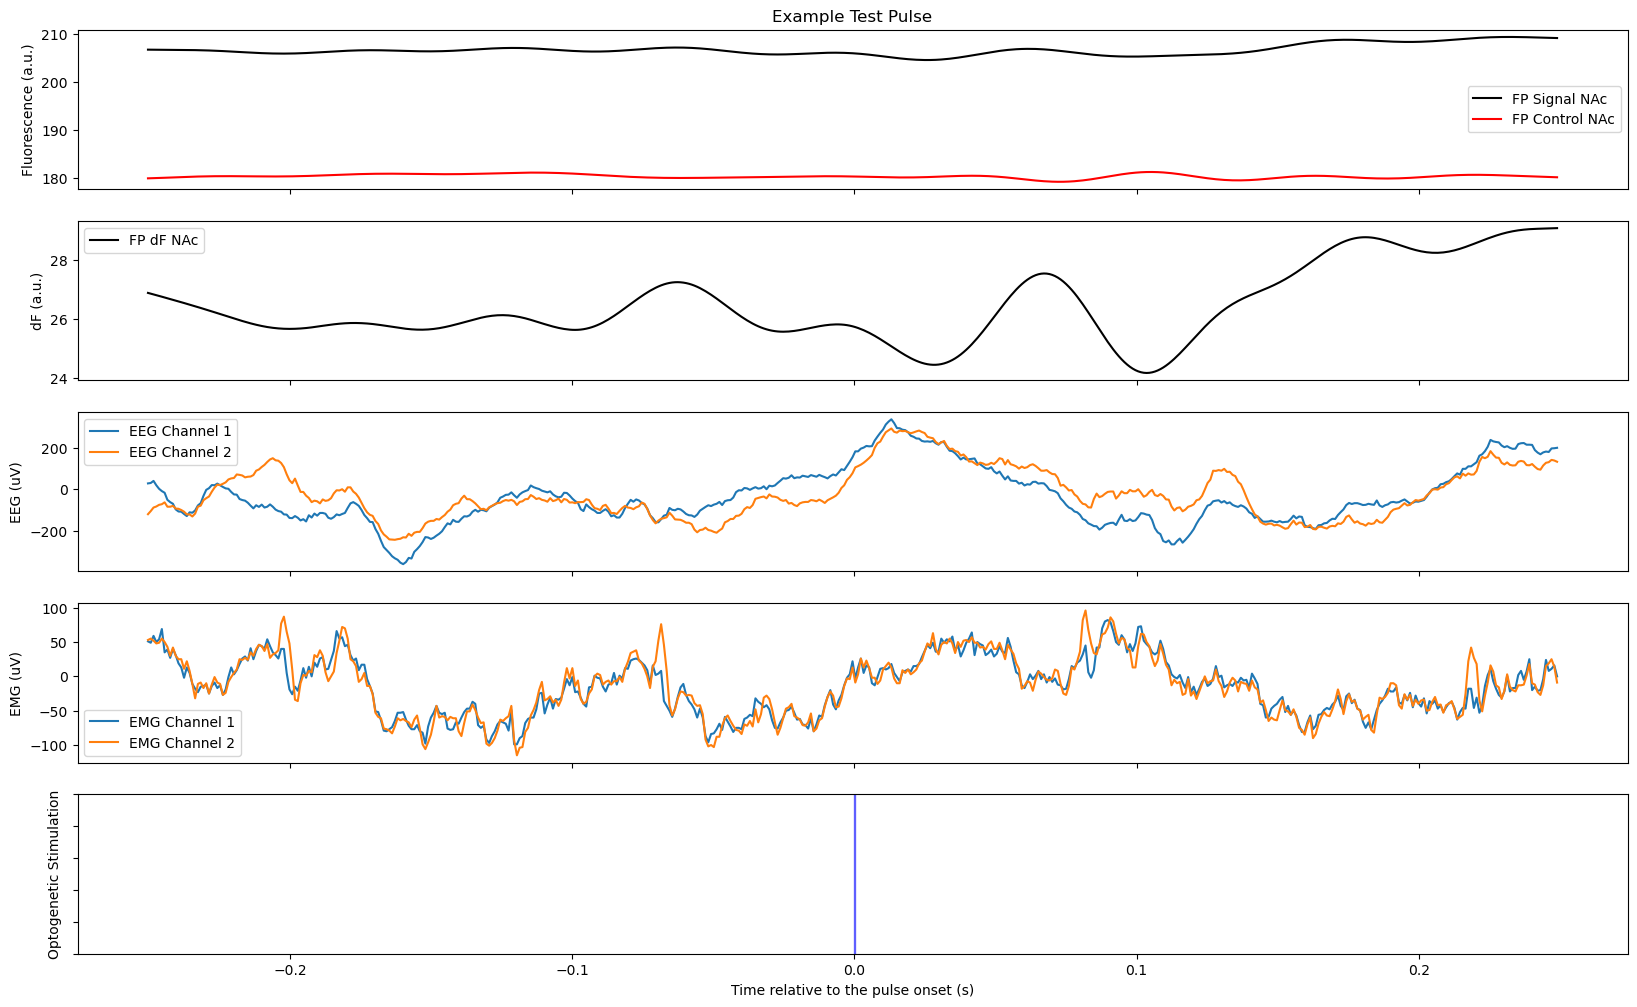

In [4]:
example_pulse = test_pulse_df.iloc[2]

# Define plot parameters
grace_time = 0.25

# Define time windows for plotting
plot_start_time = example_pulse["start_time"] - grace_time
plot_end_time = example_pulse["stop_time"] + grace_time
fp_slice = slice(int(plot_start_time * fp_rate), int(plot_end_time * fp_rate))
ephys_slice = slice(int(plot_start_time * ephys_rate), int(plot_end_time * ephys_rate))

# Normalize times to pulse start time
pulse_start_time = example_pulse["start_time"]
normalized_pulse_stop_time = example_pulse["stop_time"] - pulse_start_time
normalized_fp_timestamps = fp_timestamps[fp_slice] - pulse_start_time
normalized_ephys_timestamps = ephys_timestamps[ephys_slice] - pulse_start_time

fig, axs = plt.subplots(5, 1, figsize=(20, 12), sharex=True)
axs[0].set_title("Example Test Pulse")

axs[0].plot(normalized_fp_timestamps, fp_signal_nac_data[fp_slice], color="k", label="FP Signal NAc")
axs[0].plot(normalized_fp_timestamps, fp_control_nac_data[fp_slice], color="r", label="FP Control NAc")
axs[0].set_ylabel("Fluorescence (a.u.)")
axs[0].legend()

axs[1].plot(normalized_fp_timestamps, fp_df_nac_data[fp_slice], color="k", label="FP dF NAc")
axs[1].set_ylabel("dF (a.u.)")
axs[1].legend()

axs[2].plot(normalized_ephys_timestamps, eeg_data_in_uV[ephys_slice])
axs[2].set_ylabel("EEG (uV)")
axs[2].legend(["EEG Channel 1", "EEG Channel 2"])

axs[3].plot(normalized_ephys_timestamps, emg_data_in_uV[ephys_slice])
axs[3].set_ylabel("EMG (uV)")
axs[3].legend(["EMG Channel 1", "EMG Channel 2"])

axs[4].axvspan(0, normalized_pulse_stop_time, color="blue", alpha=0.5)
axs[4].set_xlabel("Time relative to the pulse onset (s)")
axs[4].set_yticklabels([])
axs[4].set_ylabel("Optogenetic Stimulation")

Plot Intense Stimulation Pulse Train

Text(0, 0.5, 'Optogenetic Stimulation')

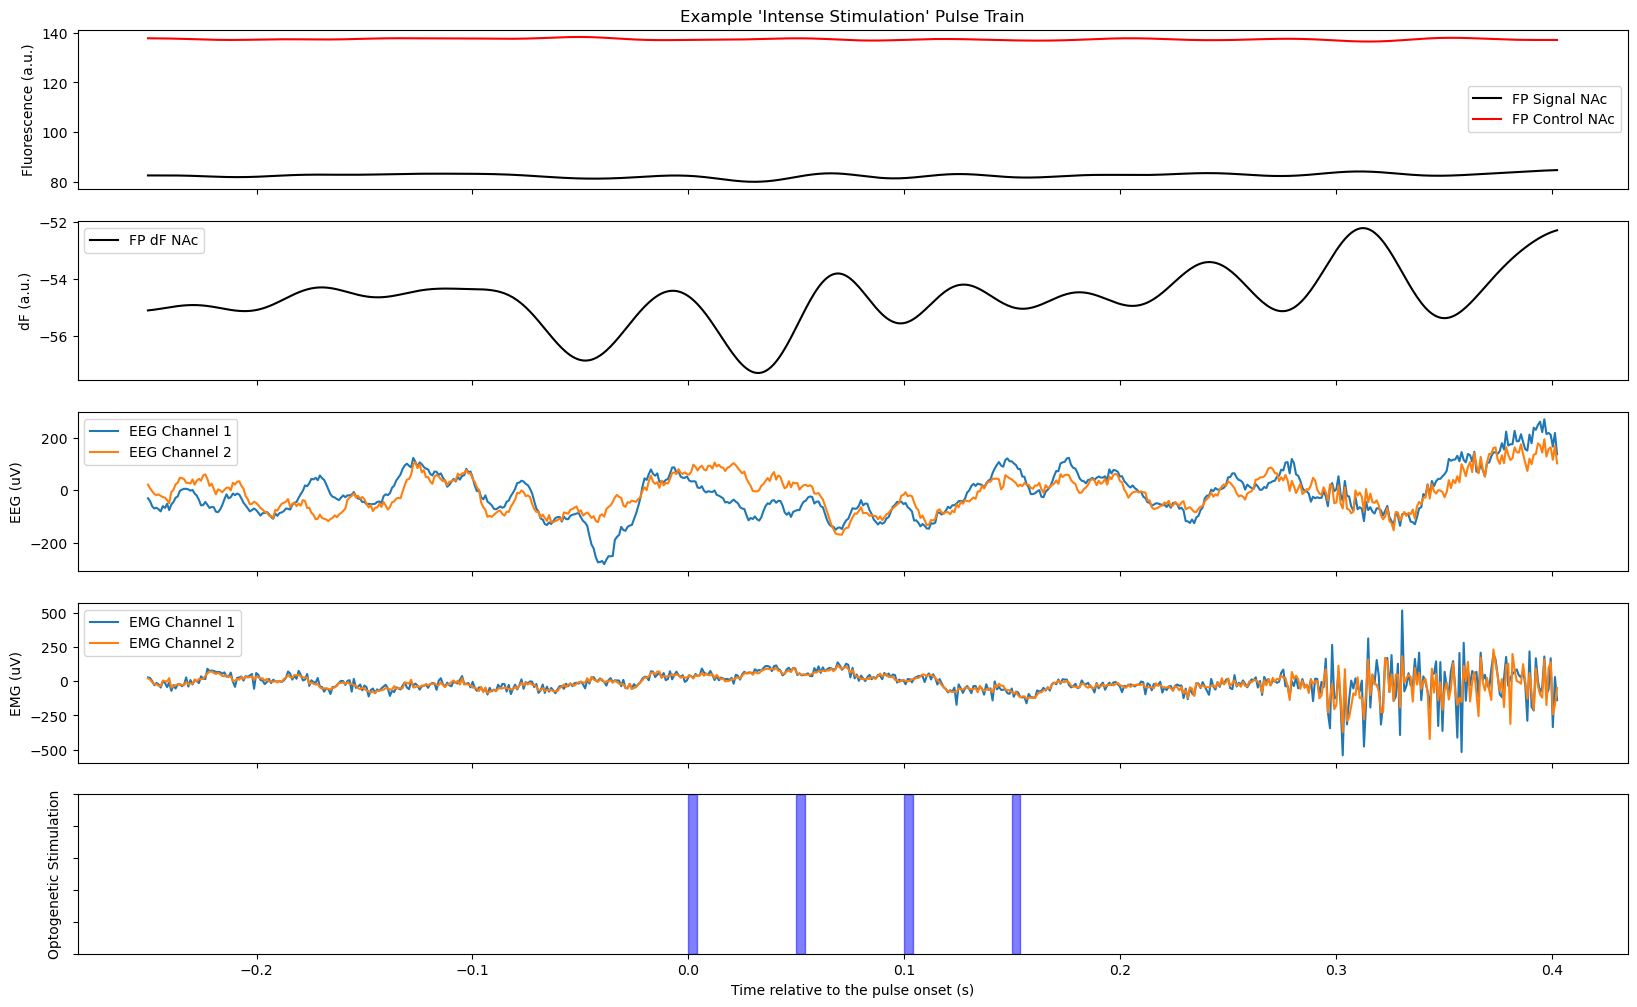

In [5]:
example_pulse_train = intense_stim_df.iloc[:4]

# Define plot parameters
grace_time = 0.25

# Define time windows for plotting
plot_start_time = example_pulse_train["start_time"].iloc[0] - grace_time
plot_end_time = example_pulse_train["stop_time"].iloc[-1] + grace_time
fp_slice = slice(int(plot_start_time * fp_rate), int(plot_end_time * fp_rate))
ephys_slice = slice(int(plot_start_time * ephys_rate), int(plot_end_time * ephys_rate))

# Normalize times to pulse start time
pulse_start_time = example_pulse_train["start_time"].iloc[0]
normalized_fp_timestamps = fp_timestamps[fp_slice] - pulse_start_time
normalized_ephys_timestamps = ephys_timestamps[ephys_slice] - pulse_start_time
normalized_pulse_start_times = example_pulse_train["start_time"] - pulse_start_time
normalized_pulse_stop_times = example_pulse_train["stop_time"] - pulse_start_time

fig, axs = plt.subplots(5, 1, figsize=(20, 12), sharex=True)
axs[0].set_title("Example 'Intense Stimulation' Pulse Train")

axs[0].plot(normalized_fp_timestamps, fp_signal_nac_data[fp_slice], color="k", label="FP Signal NAc")
axs[0].plot(normalized_fp_timestamps, fp_control_nac_data[fp_slice], color="r", label="FP Control NAc")
axs[0].set_ylabel("Fluorescence (a.u.)")
axs[0].legend()

axs[1].plot(normalized_fp_timestamps, fp_df_nac_data[fp_slice], color="k", label="FP dF NAc")
axs[1].set_ylabel("dF (a.u.)")
axs[1].legend()

axs[2].plot(normalized_ephys_timestamps, eeg_data_in_uV[ephys_slice])
axs[2].set_ylabel("EEG (uV)")
axs[2].legend(["EEG Channel 1", "EEG Channel 2"])

axs[3].plot(normalized_ephys_timestamps, emg_data_in_uV[ephys_slice])
axs[3].set_ylabel("EMG (uV)")
axs[3].legend(["EMG Channel 1", "EMG Channel 2"])

for start, stop in zip(normalized_pulse_start_times, normalized_pulse_stop_times):
    axs[4].axvspan(start, stop, color="blue", alpha=0.5)
axs[4].set_xlabel("Time relative to the pulse onset (s)")
axs[4].set_yticklabels([])
axs[4].set_ylabel("Optogenetic Stimulation")

## Opto-behavioral Example Session

In [6]:
file_path = "sub-M008/sub-M008_ses-BBB8-240819-071001-opto-behavioral_ecephys+image.nwb"
nwbfile, io = stream_nwbfile(DANDISET_ID, file_path)
display(nwbfile)

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Uncompressed size (bytes),0
Compressed size (bytes),0
Compression ratio,undefined
Data type,float64
Shape,"(148537,)"


Retrieve the Ephys and Optogenetic Stimulation Data

In [7]:
# EEG and EMG
eeg_data = nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEEG"].data[:]
eeg_data_in_uV = eeg_data * nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEEG"].conversion * 1e6
emg_data = nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEMG"].data[:]
emg_data_in_uV = emg_data * nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEMG"].conversion * 1e6
ephys_starting_time = nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEEG"].starting_time
ephys_rate = nwbfile.processing["ecephys"].data_interfaces["ElectricalSeriesEEG"].rate
ephys_timestamps = np.arange(ephys_starting_time, ephys_starting_time + (len(eeg_data) / ephys_rate), 1 / ephys_rate)

# Optogenetic Stimulation
ogen_df = nwbfile.intervals["optogenetic_pulses"].to_dataframe()
test_pulse_df = ogen_df[ogen_df["stimulus_type"] == "test_pulse"]
intense_stim_df = ogen_df[ogen_df["stimulus_type"] == "intense_stimulation"]

Plot test pulse

Text(0, 0.5, 'Optogenetic Stimulation')

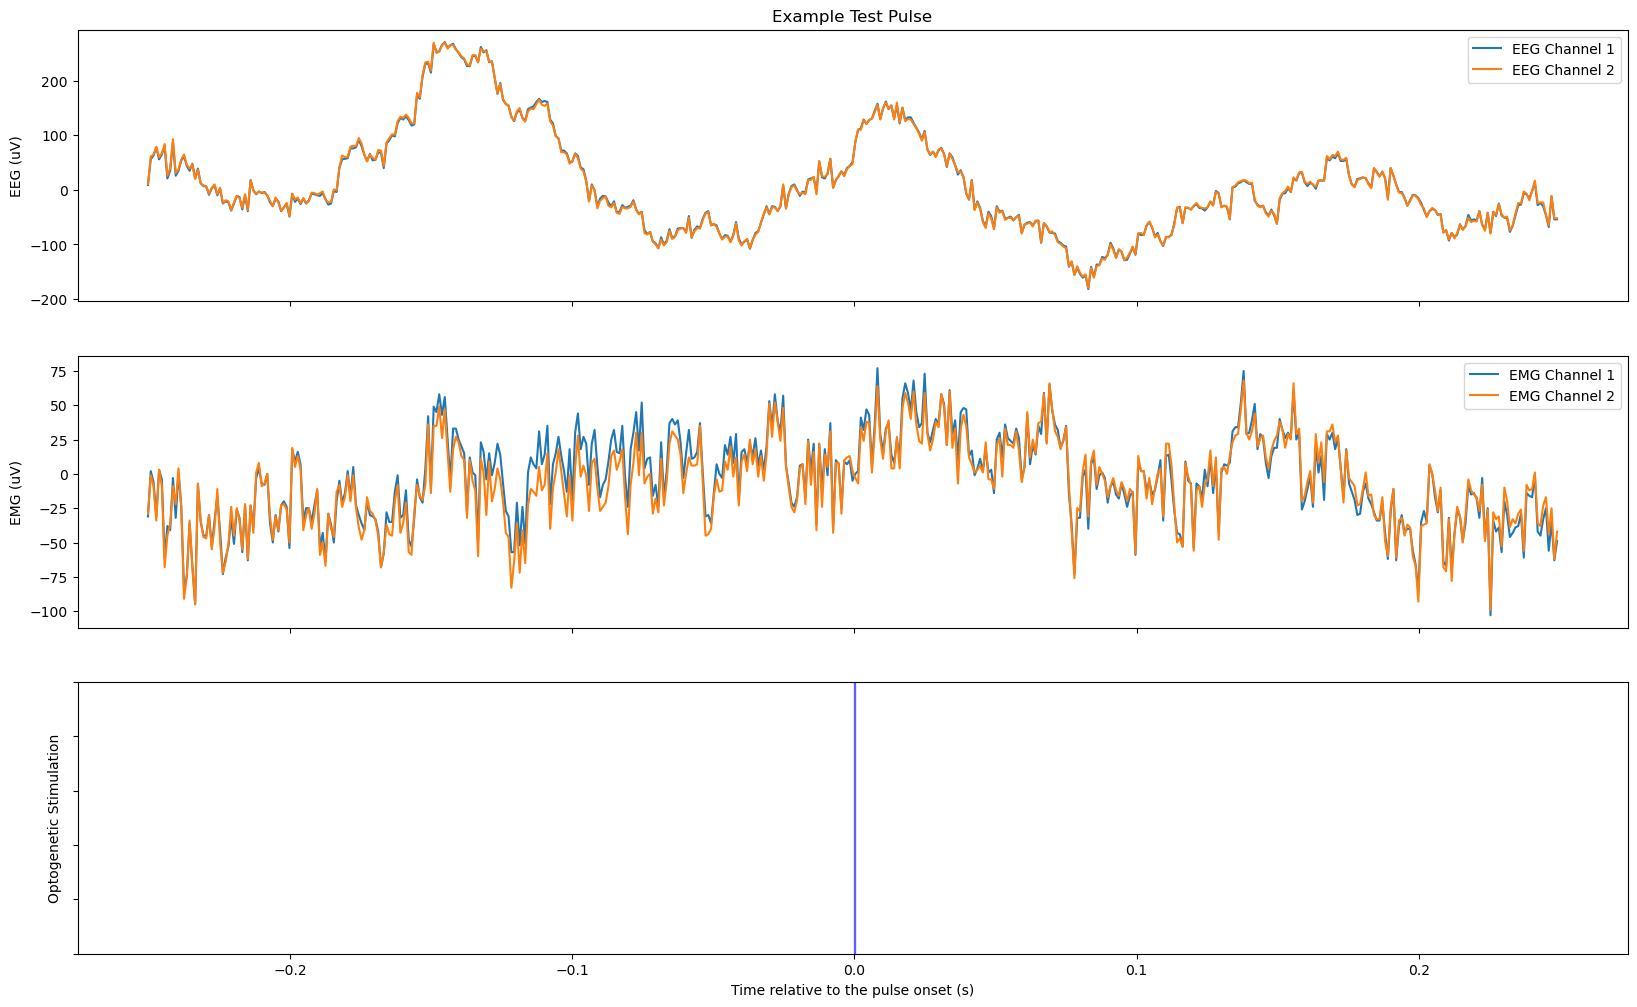

In [8]:
example_pulse = test_pulse_df.iloc[2]

# Define plot parameters
grace_time = 0.25

# Define time windows for plotting
plot_start_time = example_pulse["start_time"] - grace_time
plot_end_time = example_pulse["stop_time"] + grace_time
fp_slice = slice(int(plot_start_time * fp_rate), int(plot_end_time * fp_rate))
ephys_slice = slice(int(plot_start_time * ephys_rate), int(plot_end_time * ephys_rate))

# Normalize times to pulse start time
pulse_start_time = example_pulse["start_time"]
normalized_pulse_stop_time = example_pulse["stop_time"] - pulse_start_time
normalized_fp_timestamps = fp_timestamps[fp_slice] - pulse_start_time
normalized_ephys_timestamps = ephys_timestamps[ephys_slice] - pulse_start_time

fig, axs = plt.subplots(3, 1, figsize=(20, 12), sharex=True)
axs[0].set_title("Example Test Pulse")

axs[0].plot(normalized_ephys_timestamps, eeg_data_in_uV[ephys_slice])
axs[0].set_ylabel("EEG (uV)")
axs[0].legend(["EEG Channel 1", "EEG Channel 2"])

axs[1].plot(normalized_ephys_timestamps, emg_data_in_uV[ephys_slice])
axs[1].set_ylabel("EMG (uV)")
axs[1].legend(["EMG Channel 1", "EMG Channel 2"])

axs[2].axvspan(0, normalized_pulse_stop_time, color="blue", alpha=0.5)
axs[2].set_xlabel("Time relative to the pulse onset (s)")
axs[2].set_yticklabels([])
axs[2].set_ylabel("Optogenetic Stimulation")

Plot Intense Stimulation Pulse Train

Text(0, 0.5, 'Optogenetic Stimulation')

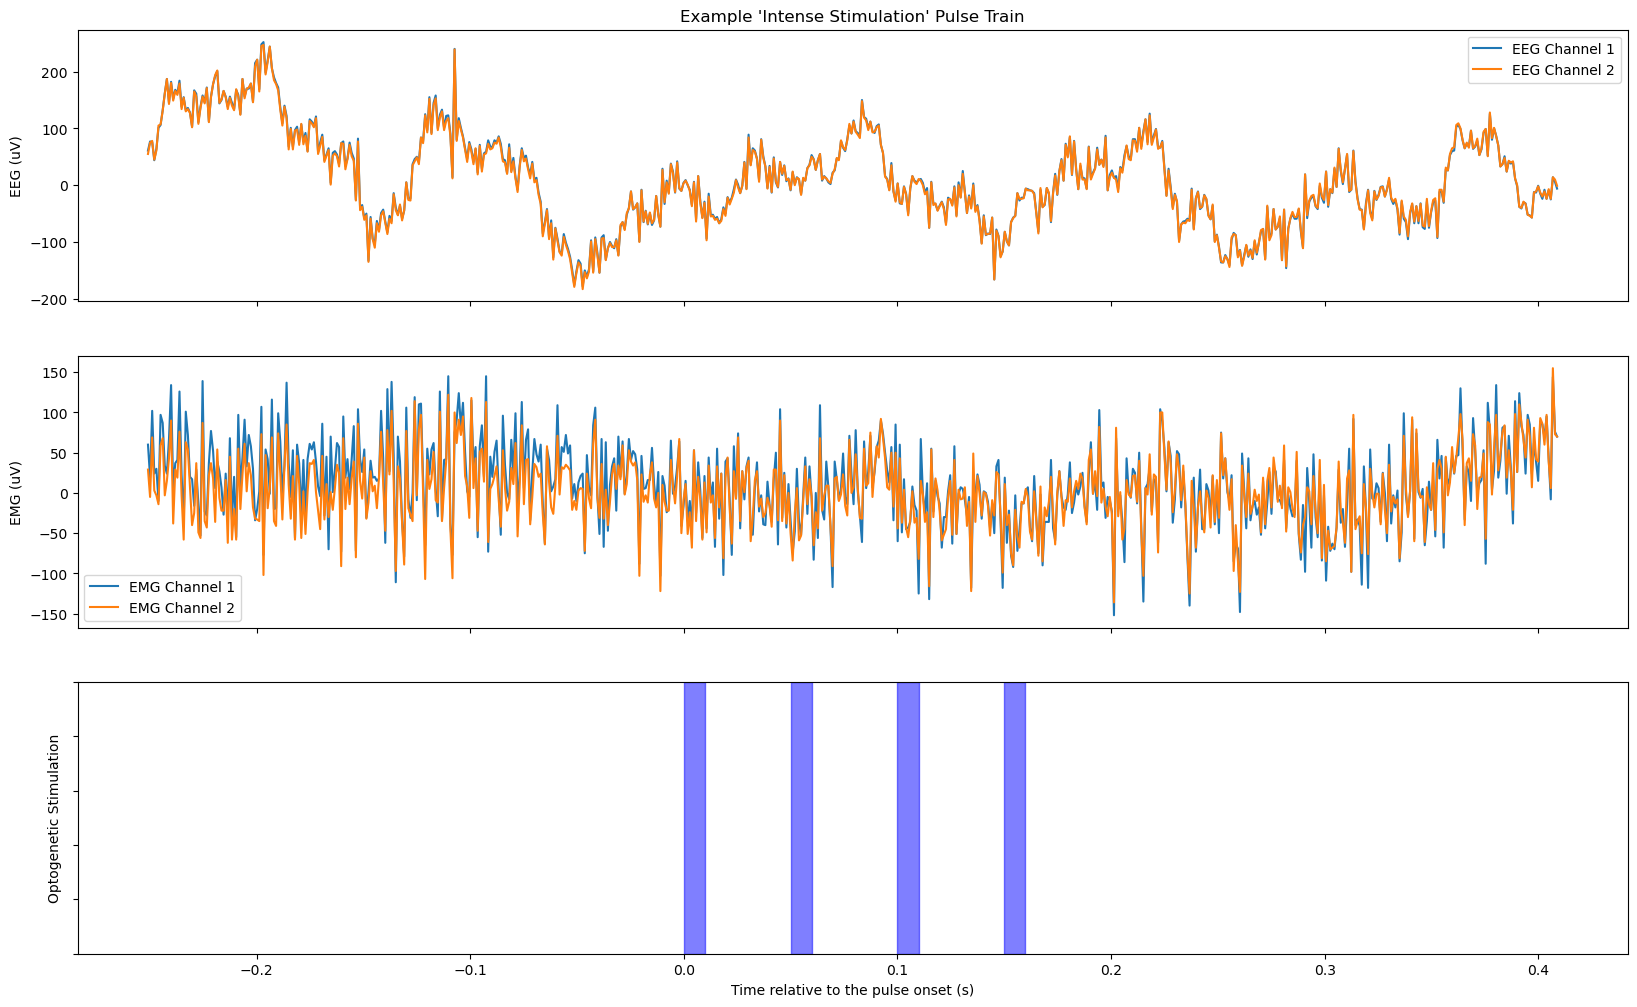

In [9]:
example_pulse_train = intense_stim_df.iloc[:4]

# Define plot parameters
grace_time = 0.25

# Define time windows for plotting
plot_start_time = example_pulse_train["start_time"].iloc[0] - grace_time
plot_end_time = example_pulse_train["stop_time"].iloc[-1] + grace_time
fp_slice = slice(int(plot_start_time * fp_rate), int(plot_end_time * fp_rate))
ephys_slice = slice(int(plot_start_time * ephys_rate), int(plot_end_time * ephys_rate))

# Normalize times to pulse start time
pulse_start_time = example_pulse_train["start_time"].iloc[0]
normalized_fp_timestamps = fp_timestamps[fp_slice] - pulse_start_time
normalized_ephys_timestamps = ephys_timestamps[ephys_slice] - pulse_start_time
normalized_pulse_start_times = example_pulse_train["start_time"] - pulse_start_time
normalized_pulse_stop_times = example_pulse_train["stop_time"] - pulse_start_time

fig, axs = plt.subplots(3, 1, figsize=(20, 12), sharex=True)
axs[0].set_title("Example 'Intense Stimulation' Pulse Train")

axs[0].plot(normalized_ephys_timestamps, eeg_data_in_uV[ephys_slice])
axs[0].set_ylabel("EEG (uV)")
axs[0].legend(["EEG Channel 1", "EEG Channel 2"])

axs[1].plot(normalized_ephys_timestamps, emg_data_in_uV[ephys_slice])
axs[1].set_ylabel("EMG (uV)")
axs[1].legend(["EMG Channel 1", "EMG Channel 2"])

for start, stop in zip(normalized_pulse_start_times, normalized_pulse_stop_times):
    axs[2].axvspan(start, stop, color="blue", alpha=0.5)
axs[2].set_xlabel("Time relative to the pulse onset (s)")
axs[2].set_yticklabels([])
axs[2].set_ylabel("Optogenetic Stimulation")
